In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/13982f58-e618-400c-8f69-6a32dbd7c68f/download/value.csv")

In [4]:
data.head()

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,"Estimate; Total: - Less than $10,000","Margin of Error; Total: - Less than $10,000","Estimate; Total: - $10,000 to $14,999","Margin of Error; Total: - $10,000 to $14,999","Estimate; Total: - $15,000 to $19,999","Margin of Error; Total: - $15,000 to $19,999",...,"Estimate; Total: - $500,000 to $749,999","Margin of Error; Total: - $500,000 to $749,999","Estimate; Total: - $750,000 to $999,999","Margin of Error; Total: - $750,000 to $999,999","Estimate; Total: - $1,000,000 to $1,499,999","Margin of Error; Total: - $1,000,000 to $1,499,999","Estimate; Total: - $1,500,000 to $1,999,999","Margin of Error; Total: - $1,500,000 to $1,999,999","Estimate; Total: - $2,000,000 or more","Margin of Error; Total: - $2,000,000 or more"
0,Allegheny Center,1,72.0,28.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000
1,Allegheny West,2,69.0,31.000000,4.0,7.000000,0.0,10.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,11.0,17.000000,0.0,10.000000,0.0,10.000000
2,Allentown,3,538.0,112.769677,45.0,33.734256,19.0,21.118712,22.0,26.153394,...,6.0,16.763055,0.0,17.320508,0.0,17.320508,0.0,17.320508,0.0,17.320508
3,Arlington,4,492.0,84.433406,12.0,16.186414,29.0,27.513633,5.0,16.248077,...,7.0,17.916473,0.0,17.320508,3.0,15.779734,0.0,17.320508,0.0,17.320508
4,Arlington Heights,5,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000


# Abstract
  Looking at the above data it can come across as a bit confusing. For this analysis I will be looking at the range of homes that are from 100,000 to 300,000 dollars as the PA average cost of a home is around the 200,000 dollar range. The neighboorhood that has the most homes in that price range will be considered the best neighborhood in this metric

In [5]:
total = []
neighborhood = []
for y in range(0, len(data.index)):
    add = 0
    for x in data.iloc[y, [30,32,34,36,38,40]]:
        #Add the number of houses per neighboorhood that fall in the range of 100k-300k in price
        add = add + x
    total.append(add)
    neighborhood.append(data.iloc[y,0])
    
dict = {"Neighborhoods": neighborhood, "Total": total} #dictionary with titles
houses = pd.DataFrame(dict)

In [156]:
neighborhood = []
percentage = []
for x in range(0, len(total)):
    if data.iloc[x,2] == 0:
        math = -1;  #For the neighboorhoods that had 0 houses in survey
    else:
        math = total[x]/ data.iloc[x, 2] * 100
    percentage.append(math)
    neighborhood.append(data.iloc[x,0])
    
dict = {"Neighborhoods": neighborhood, "Percent": percentage} #dictionary with titles
    
house_per = pd.DataFrame(dict)
house_per_sorted = house_per.sort_values('Percent', axis = 0, ascending = False, inplace = False, kind = 'quicksort')

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

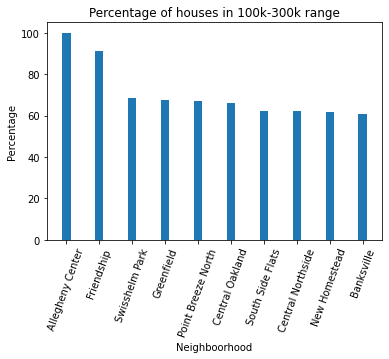

In [192]:
top10N = []
top10P = []
for x in range(0, 10):
    top10N.append(house_per_sorted.iloc[x, 0])
    top10P.append(house_per_sorted.iloc[x, 1])

#Produce bar graph of percentage of homes in price range by neighborhood
plt.bar(top10N, top10P, width = 0.25)
plt.title("Percentage of houses in 100k-300k range")
plt.xlabel("Neighboorhood")
plt.ylabel("Percentage")
plt.xticks(rotation = 70)
plt.show()

In [200]:
allHomes = []
neighborhood = []
for x in range(0, len(data.index)):
    allHomes.append(data.iloc[x,2])
    neighborhood.append(data.iloc[x,0])
    
dict = {"Neighborhoods": neighborhood, "All Homes": allHomes} #dictionary with titles
totalHouses = pd.DataFrame(dict)

totalHouses_sorted = totalHouses.sort_values('All Homes', axis = 0, ascending = False, inplace = False, kind = 'quicksort')
totalHouses_sorted

,Neighborhoods,All Homes
13,Brookline,4245.0
77,Squirrel Hill South,3152.0
15,Carrick,2624.0
12,Brighton Heights,2206.0
7,Beechview,2065.0
...,...,...
21,Chateau,3.0
57,North Shore,0.0
35,Glen Hazel,0.0
4,Arlington Heights,0.0


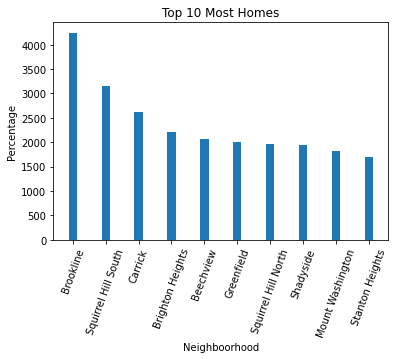

In [203]:
top10TotalN = []
top10TotalP = []
for x in range(0, 10):
    top10TotalN.append(totalHouses_sorted.iloc[x, 0])
    top10TotalP.append(totalHouses_sorted.iloc[x, 1])
    
#Produce Bar Graph of most homes by neighborhood
plt.bar(top10TotalN, top10TotalP, width = 0.25)
plt.title("Top 10 Most Homes")
plt.xlabel("Neighboorhood")
plt.ylabel("Percentage")
plt.xticks(rotation = 70)
plt.show()

# Results
The graph below shows that Squirrel Hill South has the most homes in our chosen price range meaning that it is the best neighborhood in Pittsburgh according to this metric

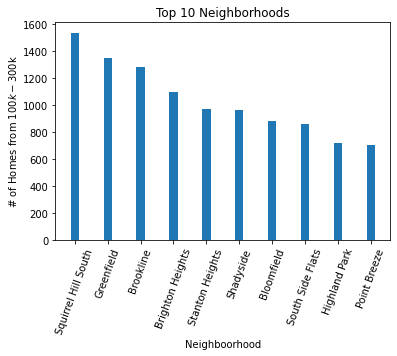

In [10]:
#Sort the houses in our price range from most to least per neighborhood
houses_sorted = houses.sort_values('Total', axis = 0, ascending = False, inplace = False, kind = 'quicksort')
top10NOvr = []
top10POvr = []
for x in range(0, 10):
    top10NOvr.append(houses_sorted.iloc[x, 0])
    top10POvr.append(houses_sorted.iloc[x, 1])
    
#Produce bar graph of homes
plt.bar(top10NOvr, top10POvr, width = 0.25)
plt.title("Top 10 Neighborhoods")
plt.xlabel("Neighboorhood")
plt.ylabel("# of Homes from $100k-$300k")
plt.xticks(rotation = 70)
plt.show()